In [3]:
import numpy as np
import pandas as pd

from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt

In [22]:
life_data = pd.read_csv('../curves-modules/datasets/life.csv').dropna()

In [23]:
life_data[life_data['Gender']=='male'].count()

Unnamed: 0         4082
Body Type          4082
Record Number      4082
Age                4082
Gender             4082
                   ... 
WAISTBAND_DEPTH    4082
BELLY_DEPTH        4082
MAX_BELLY_DEPTH    4082
HIP_DEPTH          4082
BUTTOCK_DEPTH      4082
Length: 139, dtype: int64

In [24]:
life_data[life_data['Gender']=='female'].count()

Unnamed: 0         4300
Body Type          4300
Record Number      4300
Age                4300
Gender             4300
                   ... 
WAISTBAND_DEPTH    4300
BELLY_DEPTH        4300
MAX_BELLY_DEPTH    4300
HIP_DEPTH          4300
BUTTOCK_DEPTH      4300
Length: 139, dtype: int64

In [10]:
def check(regressor, gender='female'):
    life_male_data = life_data[life_data['Gender']==gender]
    life_male_age = life_male_data["Age"]
    life_male_data = life_male_data.drop(['Unnamed: 0', 'Body Type', 'Record Number', 'Age', 'Gender', 'BMI',
        'WHR', 'WHtR', 'ABSI', 'Age'], axis=1)
    X = life_male_data
    y = life_male_age

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    clt = regressor(random_state=42, n_estimators=100)
    clt.fit(x_train, y_train)
    y_generated = np.rint(clt.predict(x_test))
    mean_absolute_percentage_error(y_generated, y_test)

    possibilities = sorted(zip(clt.feature_importances_, life_male_data.columns), reverse=True)
    possibilities_len = len(possibilities)

    error = []
    for size in range(possibilities_len):
        semantic = np.array(possibilities[0:size+1])[:,1]
        x_train, x_test, y_train, y_test = train_test_split(X[semantic], y, test_size=0.33, random_state=42)
        clt = regressor(random_state=42, n_estimators=100)
        clt.fit(x_train, y_train)
        y_generated = np.rint(clt.predict(x_test))
        error.append(mean_absolute_percentage_error(y_generated, y_test))
    error = np.array(error)

    plt.figure(figsize=(10,7))
    plt.plot(error)
    plt.ylabel("%error")
    plt.xlabel("number of measurements")
    plt.show()

    return error

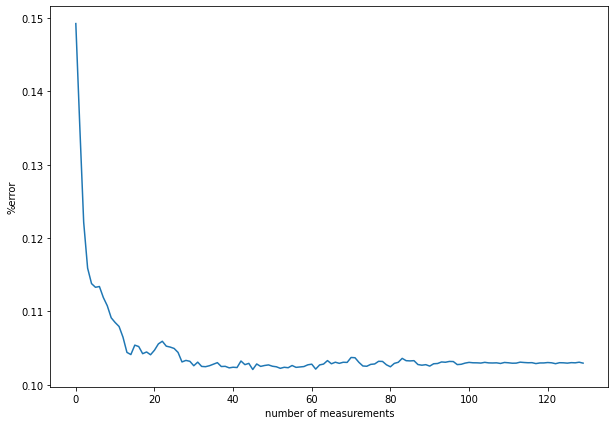

In [11]:
rm = check(GradientBoostingRegressor, 'male')

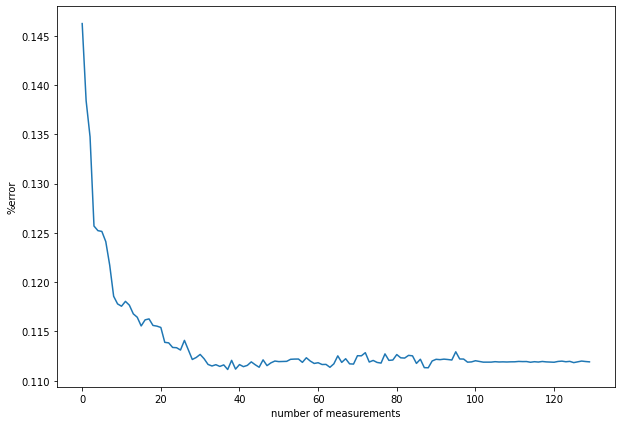

In [12]:
rfm = check(GradientBoostingRegressor, 'female')

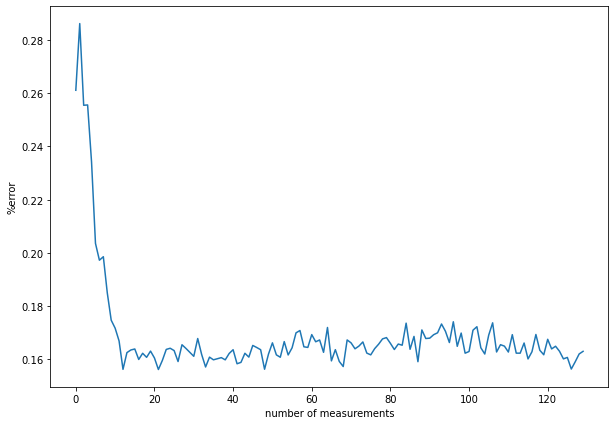

In [13]:
cm = check(GradientBoostingClassifier, 'male')

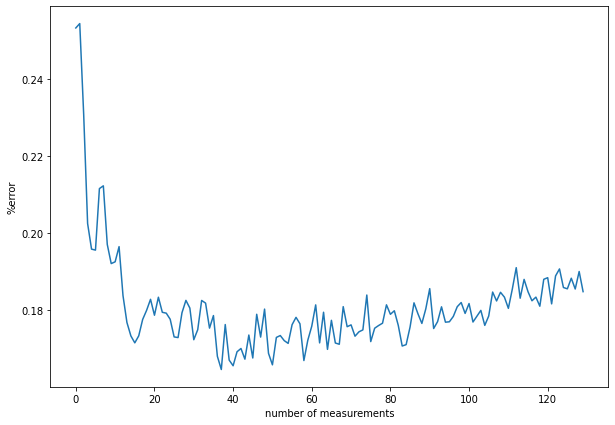

In [14]:
cfm = check(GradientBoostingClassifier, 'female')

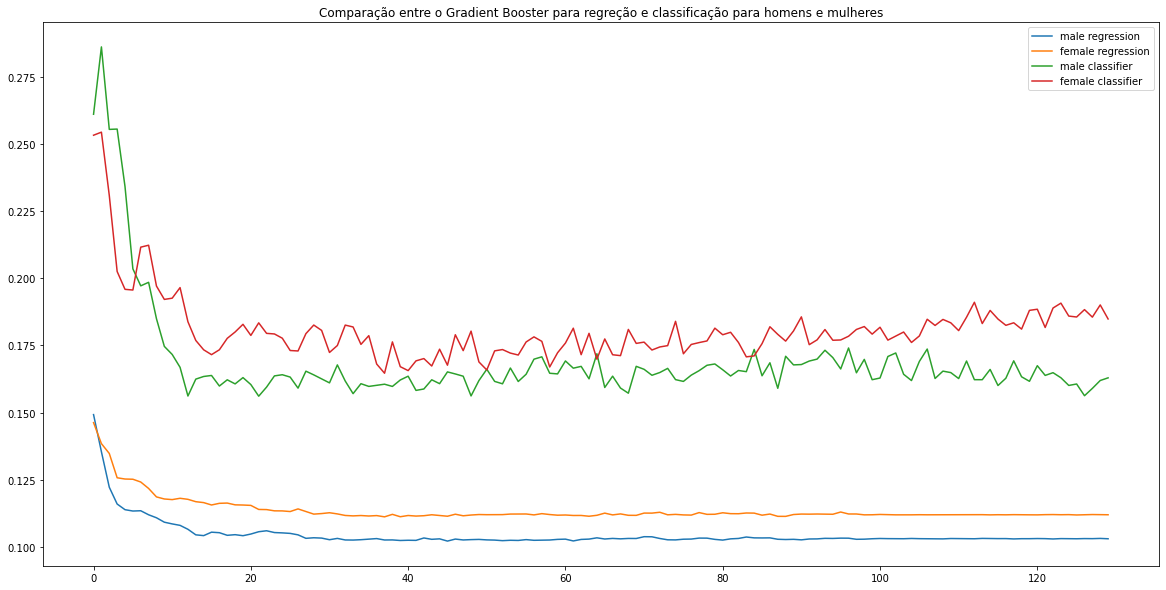

In [42]:
data = np.array([rm,rfm,cm,cfm]).T
pd.DataFrame(data , columns=['male regression', 'female regression', 'male classifier', 'female classifier']).plot(figsize=(20,10))
plt.title("Comparação entre o Gradient Booster para regreção e classificação para homens e mulheres")
plt.show()
